In [10]:
import torch
from torchvision.models import resnet18, resnet34, resnet50, wide_resnet50_2
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import numpy as np
import random
from torch_cka import CKA



In [3]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = torch.Generator()
g.manual_seed(0)
np.random.seed(0)
random.seed(0)

model1 = resnet18(pretrained=True)
model2 = resnet34(pretrained=True)


/Users/biancatoto/7643-fastmri/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/biancatoto/7643-fastmri/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/biancatoto/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 41.7MB/s]
/Users/biancatoto/7643-fastmri/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments othe

In [ ]:
print(model1)
# print a model summary


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
print(model2)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

batch_size = 256

dataset = CIFAR10(root='../data/',
                  train=False,
                  download=True,
                  transform=transform)

dataloader = DataLoader(dataset,
                        batch_size=batch_size,
                        shuffle=False,
                        worker_init_fn=seed_worker,
                        generator=g,)

# cka = CKA(model1, model2,
#         model1_name="ResNet18", model2_name="ResNet34",
#         device='cuda')
#
# cka.compare(dataloader)
#
# cka.plot_results(save_path="../assets/resnet_compare.png")


#===============================================================
model1 = resnet50(pretrained=True)
model2 = wide_resnet50_2(pretrained=True)


cka = TestCKA(model1, model2,
        model1_name="ResNet50", model2_name="WideResNet50")

# cka.compare(dataloader)

# cka.plot_results()

NameError: name 'transforms' is not defined

In [11]:
model1 = resnet50(pretrained=True)
model2 = wide_resnet50_2(pretrained=True)
cka = TestCKA(model1, model2,
        model1_name="ResNet50", model2_name="WideResNet50", device="mps", model1_layers=["layer1"], model2_layers=["layer1"])

# cka.compare(dataloader)

# cka.plot_results()

/Users/biancatoto/7643-fastmri/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/biancatoto/7643-fastmri/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/biancatoto/7643-fastmri/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`

Model 1
The name of the layer is: 
The layer is: ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0)

In [1]:
import torch.nn as nn
import matplotlib.pyplot as plt
import os
import pathlib
from argparse import ArgumentParser

import pytorch_lightning as pl

from fastmri.data.mri_data import SliceDataset, fetch_dir
from fastmri.data.subsample import create_mask_for_mask_type
from fastmri.data.transforms import UnetDataTransform
from fastmri.pl_modules import FastMriDataModule
from fastmri.pl_modules.kdist_unet_module import KDistUnetModule
from pathlib import Path
from fastmri.models import Unet
import requests
import tqdm
import torch
from fastmri.pl_modules.mod_unet_module import ModUnetModule
from huggingface_hub import hf_hub_download

# dataset = SliceDataset(
#             root="singlecoil_test",
#             transform=UnetDataTransform(which_challenge="singlecoil"),
#             challenge="singlecoil",
#             repo_id="btoto3/fastmri-dl",
#             max_len=4,
#         )
# dataloader = torch.utils.data.DataLoader(dataset, num_workers=4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
teacher_model = Unet(in_chans=1, out_chans=1, chans=256, num_pool_layers=4, drop_prob=0.0)
teacher_model.load_state_dict(torch.load(Path('knee_sc_leaderboard_state_dict.pt'), weights_only=True, map_location=device))
#teacher_model = teacher_model


REPO_ID = 'ttaylor99/kdist'
test_model_name = "Center-Weighted MSE Model"
test_model = Unet(in_chans=1, out_chans=1, chans=32, num_pool_layers=4, drop_prob=0.0)
layers_to_include_test = ["down_sample_layers","conv", "up_conv"]
layers_to_include_base = layers_to_include_test

REPO_ID = 'ttaylor99/kdist'
test_model_path = hf_hub_download(repo_id=REPO_ID, filename="epoch=9-step=35720.ckpt", repo_type="model")

test_model_state_dict = torch.load(test_model_path, map_location='cpu')

# Update the state dict to remove the prefix 'unet' from the keys
test_model_state_dict['state_dict'] = {k.replace('student_unet.', ''): v for k, v in test_model_state_dict['state_dict'].items()}
#     # remove teacher_unet keys and projection layers if present
test_model_state_dict['state_dict'] = {k: v for k, v in test_model_state_dict['state_dict'].items() if 'teacher_unet' not in k and 'projection_layers' not in k}
#test_model_state_dict['state_dict'] = {k.replace('unet.', ''): v for k, v in test_model_state_dict['state_dict'].items()}
test_model.load_state_dict(test_model_state_dict['state_dict'])
#test_model = test_model

/Users/biancatoto/7643-fastmri/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/3p/9rzmw1nn0375tq8fkdy38mmm0000gn/T/ipykernel_36944/3696408152.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.

<All keys matched successfully>

In [2]:
print(test_model)

Unet(
  (down_sample_layers): ModuleList(
    (0): ConvBlock(
      (layers): Sequential(
        (0): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
        (3): Dropout2d(p=0.0, inplace=False)
        (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (5): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (6): LeakyReLU(negative_slope=0.2, inplace=True)
        (7): Dropout2d(p=0.0, inplace=False)
      )
    )
    (1): ConvBlock(
      (layers): Sequential(
        (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
        (3): 

In [8]:
cka = TestCKA(model1=test_model, 
              model2=teacher_model, 
              model1_name=test_model_name, 
              model2_name="Pretrained Model", 
              model1_layers=['down_sample_layers.0','conv'],#, 'conv', 'up_conv.3'], 
              model2_layers=['down_sample_layers.0','conv'])#, 'conv', 'up_conv.3'])
    

Model 1
The name of the layer is: 
The layer is: Unet(
  (down_sample_layers): ModuleList(
    (0): ConvBlock(
      (layers): Sequential(
        (0): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
        (3): Dropout2d(p=0.0, inplace=False)
        (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (5): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (6): LeakyReLU(negative_slope=0.2, inplace=True)
        (7): Dropout2d(p=0.0, inplace=False)
      )
    )
    (1): ConvBlock(
      (layers): Sequential(
        (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): LeakyReL

In [29]:
cka.model1_info['Layers']

#'down_sample_layers.0', 'conv', 'up_conv.3'

['',
 'down_sample_layers',
 'down_sample_layers.0',
 'down_sample_layers.0.layers',
 'down_sample_layers.0.layers.0',
 'down_sample_layers.0.layers.1',
 'down_sample_layers.0.layers.2',
 'down_sample_layers.0.layers.3',
 'down_sample_layers.0.layers.4',
 'down_sample_layers.0.layers.5',
 'down_sample_layers.0.layers.6',
 'down_sample_layers.0.layers.7',
 'down_sample_layers.1',
 'down_sample_layers.1.layers',
 'down_sample_layers.1.layers.0',
 'down_sample_layers.1.layers.1',
 'down_sample_layers.1.layers.2',
 'down_sample_layers.1.layers.3',
 'down_sample_layers.1.layers.4',
 'down_sample_layers.1.layers.5',
 'down_sample_layers.1.layers.6',
 'down_sample_layers.1.layers.7',
 'down_sample_layers.2',
 'down_sample_layers.2.layers',
 'down_sample_layers.2.layers.0',
 'down_sample_layers.2.layers.1',
 'down_sample_layers.2.layers.2',
 'down_sample_layers.2.layers.3',
 'down_sample_layers.2.layers.4',
 'down_sample_layers.2.layers.5',
 'down_sample_layers.2.layers.6',
 'down_sample_layer

In [ ]:

dataset = SliceDataset(
            root="singlecoil_val",
            transform=UnetDataTransform(which_challenge="singlecoil"),
            challenge="singlecoil",
            repo_id="btoto3/fastmri-dl",
            max_len=1,
        )
dl = DataLoader(dataset, num_workers=4, batch_size=2)
def compute_cka_for_two_models_batch(model_1, model_2, layer_names, input_tensor, batch_size=1):
    # Initialize an empty list to store feature maps for each layer
    feature_maps_1 = {layer_name: [] for layer_name in layer_names}
    feature_maps_2 = {layer_name: [] for layer_name in layer_names}

    # DataLoader for batch processing
    data_loader = DataLoader(slice_dataset, batch_size=batch_size, shuffle=False)

    # Loop through batches and extract feature maps
    for data, label in data_loader:
        with torch.no_grad():  # No need for gradients during CKA calculation
            # Pass the data through both models to get feature maps
            model_1(data)
            model_2(data)

            # Collect the feature maps for each layer
            for layer_name in layer_names:
                feature_maps_1[layer_name].append(extract_feature_map(model_1, layer_name, data))
                feature_maps_2[layer_name].append(extract_feature_map(model_2, layer_name, data))

    # Convert the feature map lists to tensors
    for layer_name in layer_names:
        feature_maps_1[layer_name] = torch.cat(feature_maps_1[layer_name], dim=0)
        feature_maps_2[layer_name] = torch.cat(feature_maps_2[layer_name], dim=0)

    # Now compute the CKA matrix across all batches for each layer
    cka_matrix = torch.zeros(len(layer_names), len(layer_names))

    for i, layer_name_1 in enumerate(layer_names):
        for j, layer_name_2 in enumerate(layer_names):
            # Compute CKA score between the feature maps of corresponding layers
            cka_matrix[i, j] = compute_cka_score(feature_maps_1[layer_name_1], feature_maps_2[layer_name_2])

    return cka_matrix

# Use the function to compute the CKA matrix for multiple batches
cka_matrix = compute_cka_for_two_models_batch(teacher_model, test_model, layer_names, input_tensor, batch_size=8)

# Visualize the CKA matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cka_matrix, annot=True, cmap='coolwarm', xticklabels=layer_names, yticklabels=layer_names)
plt.title("CKA Matrix for Multiple Batches")
plt.show()

#cka.compare(dl)

[DEBUG] Number of batches: 18
[DEBUG] Model1 layers: 2, Model2 layers: 2


/var/folders/3p/9rzmw1nn0375tq8fkdy38mmm0000gn/T/ipykernel_27223/327942632.py:164: UserWarning: Dataloader for Model 2 is not given. Using the same dataloader for both models.
  warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
| Comparing features |:   0%|          | 0/18 [00:00<?, ?it/s]

[DEBUG] Batch 1/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:   6%|▌         | 1/18 [00:23<06:44, 23.81s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 2/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:  11%|█         | 2/18 [00:50<06:48, 25.50s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 3/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:  17%|█▋        | 3/18 [01:18<06:42, 26.86s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 4/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:  22%|██▏       | 4/18 [01:47<06:26, 27.59s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 5/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])
[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])


| Comparing features |:  28%|██▊       | 5/18 [02:16<06:03, 27.93s/it]

[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 6/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:  33%|███▎      | 6/18 [02:44<05:38, 28.20s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 7/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:  39%|███▉      | 7/18 [03:14<05:13, 28.49s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 8/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:  44%|████▍     | 8/18 [03:41<04:42, 28.27s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 9/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:  50%|█████     | 9/18 [04:09<04:11, 27.97s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 10/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:  56%|█████▌    | 10/18 [04:37<03:44, 28.00s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 11/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:  61%|██████    | 11/18 [05:04<03:14, 27.83s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 12/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:  67%|██████▋   | 12/18 [05:30<02:43, 27.21s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 13/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:  72%|███████▏  | 13/18 [05:55<02:13, 26.66s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 14/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:  78%|███████▊  | 14/18 [06:21<01:45, 26.47s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 15/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:  83%|████████▎ | 15/18 [06:47<01:18, 26.29s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 16/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])


| Comparing features |:  89%|████████▉ | 16/18 [07:12<00:51, 25.91s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 17/18, x1 shape: torch.Size([2, 320, 320]), x2 shape: torch.Size([2, 320, 320])
[DEBUG] Model1 layer 0, feature shape: torch.Size([2, 26214400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])


| Comparing features |:  94%|█████████▍| 17/18 [07:38<00:25, 25.87s/it]

[DEBUG] Model1 layer 1, feature shape: torch.Size([2, 1638400]), K shape: torch.Size([2, 2])
[DEBUG] Model2 layer 0, feature shape: torch.Size([2, 26214400]), L shape: torch.Size([2, 2])
[DEBUG] Model2 layer 1, feature shape: torch.Size([2, 1638400]), L shape: torch.Size([2, 2])
[DEBUG] Batch 18/18, x1 shape: torch.Size([1, 320, 320]), x2 shape: torch.Size([1, 320, 320])


| Comparing features |: 100%|██████████| 18/18 [07:50<00:00, 21.80s/it]

[DEBUG] Model1 layer 0, feature shape: torch.Size([1, 26214400]), K shape: torch.Size([1, 1])
[DEBUG] Model2 layer 0, feature shape: torch.Size([1, 26214400]), L shape: torch.Size([1, 1])
[DEBUG] Model2 layer 1, feature shape: torch.Size([1, 1638400]), L shape: torch.Size([1, 1])
[DEBUG] Model1 layer 1, feature shape: torch.Size([1, 1638400]), K shape: torch.Size([1, 1])
[DEBUG] Model2 layer 0, feature shape: torch.Size([1, 26214400]), L shape: torch.Size([1, 1])
[DEBUG] Model2 layer 1, feature shape: torch.Size([1, 1638400]), L shape: torch.Size([1, 1])


| Comparing features |: 100%|██████████| 18/18 [08:10<00:00, 27.27s/it]


[DEBUG] Final HSIC matrix shape: torch.Size([2, 2])
[DEBUG] HSIC matrix values:
tensor([[nan, nan],
        [nan, nan]])


AssertionError: HSIC computation resulted in NANs

In [9]:
cka.model2_features

{'down_sample_layers.0': tensor([[[[-1.1476e-01, -4.3274e-02, -1.2659e-01,  ..., -1.3036e-01,
            -1.3373e-01, -6.9998e-02],
           [ 5.9036e-01,  1.7332e-01,  1.3259e+00,  ...,  3.0359e-01,
            -7.3038e-02,  2.2528e-02],
           [-9.5917e-02, -1.6732e-01, -1.3806e-01,  ..., -1.5004e-01,
            -7.5933e-02,  1.2853e-02],
           ...,
           [-2.0398e-02,  4.9148e-02,  1.5316e-01,  ..., -3.7851e-02,
            -2.0276e-01,  7.6942e-02],
           [ 8.3858e-01,  1.6735e-01,  1.1957e-02,  ...,  2.5142e-01,
             8.5095e-01, -1.1876e-02],
           [-4.5332e-02,  2.8312e-01,  1.2222e+00,  ...,  1.1211e+00,
             4.8800e-01,  1.9632e-01]],
 
          [[ 1.7006e-01,  5.4312e-01,  7.2767e-01,  ...,  9.2292e-01,
             4.5181e-01,  3.6117e-01],
           [ 1.1194e-01,  2.5541e-01,  3.3234e-01,  ...,  1.9677e-02,
            -9.5676e-02, -8.3766e-03],
           [-1.6828e-02,  2.4807e-01,  1.9327e-01,  ...,  1.0673e+00,
             9.

In [ ]:
cka.plot_results('cka-baseline-test.png')

In [39]:
features1 = cka.model1_features
features1 = features1['down_sample_layers.0']
# features1 = (features1 - features1.mean()) / features1.std()
#features2 = (features2 - features2.mean()) / features2.std()

AttributeError: 'function' object has no attribute 'model1_features'

In [20]:
features2 = cka.model2_features
features2 = features2['down_sample_layers.0']
features2 = (features2 - features2.mean()) / features2.std()

In [ ]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

file_name = '/Users/travistaylor/mri/reconstruction/file1000022_kdist.h5'
hf_kdist = h5py.File(file_name)
img = hf_kdist['reconstruction'][15]
img = img / img.max()
plt.imshow(img, cmap='gray’) is the code

In [34]:

import torch
from tqdm import tqdm

# Define functions for CKA, kernel computation, and centering
def linear_kernel(X, Y=None):
    """Compute linear kernel (dot product)."""
    if Y is None:
        Y = X
    return torch.matmul(X, Y.T)

def center_kernel(K):
    """Center the kernel matrix."""
    n = K.size(0)
    ones = torch.ones(n, n) / n
    K_centered = K - torch.matmul(ones, K) - torch.matmul(K, ones) + torch.matmul(torch.matmul(ones, K), ones)
    return K_centered

def cka(K1, K2):
    """Compute CKA score between two kernel matrices."""
    # Center the kernel matrices
    K1_centered = center_kernel(K1)
    K2_centered = center_kernel(K2)
    
    # Compute the CKA score
    numerator = torch.trace(torch.matmul(K1_centered.T, K2_centered))
    denominator = torch.sqrt(torch.trace(torch.matmul(K1_centered.T, K1_centered)) * torch.trace(torch.matmul(K2_centered.T, K2_centered)))
    return numerator / denominator

# Assuming `features1` and `features2` are the feature dictionaries from both models
# Example:
# features1 = {'down_sample_layers.0': feature_map1, ...}
# features2 = {'down_sample_layers.0': feature_map2, ...}

hsic_matrix = torch.zeros(1, 1, 3)  # Initialize CKA matrix


# Flatten the feature maps (features from model1)
X = features1.view(features1.size(0), -1)  # Flatten the features
K1 = linear_kernel(X)  # Compute the kernel matrix for model1 features
#K1.fill_diagonal_(0.0)  # Remove diagonal entries (self-similarity)

        # Flatten the feature maps (features from model2)
Y = features2.view(features2.size(0), -1)  # Flatten the features
K2 = linear_kernel(Y)  # Compute the kernel matrix for model2 features
#K2.fill_diagonal_(0.0)  # Remove diagonal entries (self-similarity)

# Debugging: Print intermediate kernel shape
#print(f"[DEBUG] Model2 layer {j}, feature shape: {Y.shape}, K2 shape: {K2.shape}")

# Check that kernel matrices are of the same size
assert K1.shape == K2.shape, f"Feature shape mismatch! {K1.shape}, {K2.shape}"

# Compute CKA score and accumulate it in hsic_matrix
cka_score = cka(K1, K2)
hsic_matrix[0, 0, 1] += cka_score   # Normalize by number of layers

# Final debug output
print(f"[DEBUG] Final CKA matrix shape: {hsic_matrix.shape}")
print(f"[DEBUG] CKA matrix values:\n{hsic_matrix[:, :, 1]}")
assert not torch.isnan(hsic_matrix).any(), "CKA computation resulted in NANs"


[DEBUG] Final CKA matrix shape: torch.Size([1, 1, 3])
[DEBUG] CKA matrix values:
tensor([[nan]], grad_fn=<SelectBackward0>)


AssertionError: CKA computation resulted in NANs

In [38]:
import torch

# Define functions for CKA, kernel computation, and centering
def linear_kernel(X, Y=None):
    """Compute linear kernel (dot product)."""
    if Y is None:
        Y = X
    return torch.matmul(X, Y.T)

def center_kernel(K):
    """Center the kernel matrix."""
    n = K.size(0)
    ones = torch.ones(n, n) / n
    K_centered = K - torch.matmul(ones, K) - torch.matmul(K, ones) + torch.matmul(torch.matmul(ones, K), ones)
    return K_centered

def cka(K1, K2):
    """Compute CKA score between two kernel matrices."""
    # Center the kernel matrices
    K1_centered = center_kernel(K1)
    K2_centered = center_kernel(K2)
    
    # Compute the CKA score
    numerator = torch.trace(torch.matmul(K1_centered.T, K2_centered))
    denominator = torch.sqrt(torch.trace(torch.matmul(K1_centered.T, K1_centered)) * torch.trace(torch.matmul(K2_centered.T, K2_centered)))
    
    # Handle division by zero or small traces
    if denominator == 0:
        print("Warning: Denominator is zero, returning NaN for CKA score")
        return torch.tensor(float('nan'))

    return numerator / denominator

# Initialize dummy feature maps (replace these with your actual features)
features1 = torch.randn(1, 256, 320, 320)  # Example feature map
features2 = torch.randn(1, 256, 320, 320)  # Example feature map

# Flatten the feature maps (features from model1)
X = features1.view(features1.size(0), -1)  # Flatten the features
K1 = linear_kernel(X)  # Compute the kernel matrix for model1 features

# Flatten the feature maps (features from model2)
Y = features2.view(features2.size(0), -1)  # Flatten the features
K2 = linear_kernel(Y)  # Compute the kernel matrix for model2 features

# Check for NaN or infinity in kernel matrices
print(f"K1 values:\n{K1}")
print(f"K2 values:\n{K2}")

# Center the kernel matrices
K1_centered = center_kernel(K1)
K2_centered = center_kernel(K2)

# Check the traces
trace_K1 = torch.trace(torch.matmul(K1_centered.T, K1_centered))
trace_K2 = torch.trace(torch.matmul(K2_centered.T, K2_centered))

print(f"Trace of K1: {trace_K1}, Trace of K2: {trace_K2}")

# Compute CKA score
cka_score = cka(K1, K2)
print(f"CKA score: {cka_score}")


K1 values:
tensor([[26210156.]])
K2 values:
tensor([[26202458.]])
Trace of K1: 0.0, Trace of K2: 0.0
CKA score: nan


In [32]:
flattened_features = features1.view(features1.size(0), -1)
print(f"Flattened shape: {flattened_features.shape}")
K = flattened_features @ flattened_features.T
print(f"Kernel shape: {K.shape}, Kernel: {K}")


Flattened shape: torch.Size([1, 26214400])
Kernel shape: torch.Size([1, 1]), Kernel: tensor([[26212632.]], grad_fn=<MmBackward0>)


In [36]:
K2

tensor([[26211508.]], grad_fn=<MmBackward0>)

In [ ]:
cka.plot_results('cka-baseline-test.png')

In [ ]:
 # Print the CKA score
print("CKA Score:", cka.export())

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
from functools import partial
from warnings import warn
from typing import List, Dict
import matplotlib.pyplot as plt
from mpl_toolkits import axes_grid1
import matplotlib.pyplot as plt

def add_colorbar(im, aspect=10, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)


class TestCKA:
    def __init__(self,
                 model1: nn.Module,
                 model2: nn.Module,
                 model1_name: str = None,
                 model2_name: str = None,
                 model1_layers: List[str] = None,
                 model2_layers: List[str] = None,
                 device: str ='cpu'):
        """

        :param model1: (nn.Module) Neural Network 1
        :param model2: (nn.Module) Neural Network 2
        :param model1_name: (str) Name of model 1
        :param model2_name: (str) Name of model 2
        :param model1_layers: (List) List of layers to extract features from
        :param model2_layers: (List) List of layers to extract features from
        :param device: Device to run the model
        """

        self.model1 = model1
        self.model2 = model2

        self.device = device

        self.model1_info = {}
        self.model2_info = {}

        if model1_name is None:
            self.model1_info['Name'] = model1.__repr__().split('(')[0]
        else:
            self.model1_info['Name'] = model1_name

        if model2_name is None:
            self.model2_info['Name'] = model2.__repr__().split('(')[0]
        else:
            self.model2_info['Name'] = model2_name

        if self.model1_info['Name'] == self.model2_info['Name']:
            warn(f"Both model have identical names - {self.model2_info['Name']}. " \
                 "It may cause confusion when interpreting the results. " \
                 "Consider giving unique names to the models :)")

        self.model1_info['Layers'] = []
        self.model2_info['Layers'] = []

        self.model1_features = {}
        self.model2_features = {}

        if len(list(model1.modules())) > 150 and model1_layers is None:
            warn("Model 1 seems to have a lot of layers. " \
                 "Consider giving a list of layers whose features you are concerned with " \
                 "through the 'model1_layers' parameter. Your CPU/GPU will thank you :)")

        self.model1_layers = model1_layers

        if len(list(model2.modules())) > 150 and model2_layers is None:
            warn("Model 2 seems to have a lot of layers. " \
                 "Consider giving a list of layers whose features you are concerned with " \
                 "through the 'model2_layers' parameter. Your CPU/GPU will thank you :)")

        self.model2_layers = model2_layers

        self._insert_hooks()
        self.model1 = self.model1.to(self.device)
        self.model2 = self.model2.to(self.device)

        self.model1.eval()
        self.model2.eval()

    def _log_layer(self,
                   model: str,
                   name: str,
                   layer: nn.Module,
                   inp: torch.Tensor,
                   out: torch.Tensor):

        if model == "model1":
            out = (out - out.mean()) / (out.std() + 1e-8)
            self.model1_features[name] = out

        elif model == "model2":
            out = (out - out.mean()) / (out.std() + 1e-8)
            self.model2_features[name] = out

        else:
            raise RuntimeError("Unknown model name for _log_layer.")

    def _insert_hooks(self):
        # Model 1
        print('Model 1')
        for name, layer in self.model1.named_modules():
            print('The name of the layer is:', name)
            print('The layer is:', layer)
            if self.model1_layers is not None:
                if name in self.model1_layers:
                    self.model1_info['Layers'] += [name]
                    layer.register_forward_hook(partial(self._log_layer, "model1", name))
            else:
                self.model1_info['Layers'] += [name]
                layer.register_forward_hook(partial(self._log_layer, "model1", name))

        # Model 2
        print('Model 2')
        for name, layer in self.model2.named_modules():
            print('The name of the layer is:', name)
            print('The layer is:', layer)
            if self.model2_layers is not None:
                if name in self.model2_layers:
                    self.model2_info['Layers'] += [name]
                    layer.register_forward_hook(partial(self._log_layer, "model2", name))
            else:

                self.model2_info['Layers'] += [name]
                layer.register_forward_hook(partial(self._log_layer, "model2", name))

    def _HSIC(self, K, L):
        """
        Computes the unbiased estimate of HSIC metric.

        Reference: https://arxiv.org/pdf/2010.15327.pdf Eq (3)
        """
        N = K.shape[0]
        ones = torch.ones(N, 1).to(self.device)
        result = torch.trace(K @ L)
        result += ((ones.t() @ K @ ones @ ones.t() @ L @ ones) / ((N - 1) * (N - 2))).item()
        result -= ((ones.t() @ K @ L @ ones) * 2 / (N - 2)).item()
        return (1 / (N * (N - 3)) * result).item()

    def compare(self,
            dataloader1: DataLoader,
            dataloader2: DataLoader = None) -> None:
        """
        Computes the feature similarity between the models on the
        given datasets.
        :param dataloader1: (DataLoader)
        :param dataloader2: (DataLoader) If given, model 2 will run on this
                            dataset. (default = None)
        """

        if dataloader2 is None:
            warn("Dataloader for Model 2 is not given. Using the same dataloader for both models.")
            dataloader2 = dataloader1

        self.model1_info['Dataset'] = dataloader1.dataset.__repr__().split('\n')[0]
        self.model2_info['Dataset'] = dataloader2.dataset.__repr__().split('\n')[0]

        N = len(self.model1_layers) if self.model1_layers is not None else len(list(self.model1.modules()))
        M = len(self.model2_layers) if self.model2_layers is not None else len(list(self.model2.modules()))

        self.hsic_matrix = torch.zeros(N, M, 3)

        num_batches = min(len(dataloader1), len(dataloader2))

        print(f"[DEBUG] Number of batches: {num_batches}")
        print(f"[DEBUG] Model1 layers: {N}, Model2 layers: {M}")

        for batch_idx, ((x1, *_), (x2, *_)) in tqdm(enumerate(zip(dataloader1, dataloader2)),
                                                desc="| Comparing features |", total=num_batches):

            self.model1_features = {}
            self.model2_features = {}

            # Debug: Log batch number and shapes
            print(f"[DEBUG] Batch {batch_idx + 1}/{num_batches}, x1 shape: {x1.shape}, x2 shape: {x2.shape}")

            # Forward pass
            _ = self.model1(x1.to(self.device).unsqueeze(1))
            _ = self.model2(x2.to(self.device).unsqueeze(1))

            for i, (name1, feat1) in enumerate(self.model1_features.items()):
                X = feat1.flatten(1)
                K = X @ X.t()
                K.fill_diagonal_(0.0)

                # Debugging shapes and intermediate results
                print(f"[DEBUG] Model1 layer {i}, feature shape: {X.shape}, K shape: {K.shape}")

                self.hsic_matrix[i, :, 0] += self._HSIC(K, K) / num_batches

                for j, (name2, feat2) in enumerate(self.model2_features.items()):
                    Y = feat2.flatten(1)
                    L = Y @ Y.t()
                    L.fill_diagonal_(0)

                    # Debugging shapes and intermediate results
                    print(f"[DEBUG] Model2 layer {j}, feature shape: {Y.shape}, L shape: {L.shape}")
                    assert K.shape == L.shape, f"Feature shape mismatch! {K.shape}, {L.shape}"

                    self.hsic_matrix[i, j, 1] += self._HSIC(K, L) / num_batches
                    self.hsic_matrix[i, j, 2] += self._HSIC(L, L) / num_batches

        # Normalize HSIC values
        self.hsic_matrix = self.hsic_matrix[:, :, 1] / (self.hsic_matrix[:, :, 0].sqrt() *
                                                        self.hsic_matrix[:, :, 2].sqrt())

        # Debug final matrix
        print(f"[DEBUG] Final HSIC matrix shape: {self.hsic_matrix.shape}")
        print(f"[DEBUG] HSIC matrix values:\n{self.hsic_matrix}")

        assert not torch.isnan(self.hsic_matrix).any(), "HSIC computation resulted in NANs"


    def export(self) -> Dict:
        """
        Exports the CKA data along with the respective model layer names.
        :return:
        """
        return {
            "model1_name": self.model1_info['Name'],
            "model2_name": self.model2_info['Name'],
            "CKA": self.hsic_matrix,
            "model1_layers": self.model1_info['Layers'],
            "model2_layers": self.model2_info['Layers'],
            "dataset1_name": self.model1_info['Dataset'],
            "dataset2_name": self.model2_info['Dataset'],

        }

    def plot_results(self,
                     save_path: str = None,
                     title: str = None):
        fig, ax = plt.subplots()
        im = ax.imshow(self.hsic_matrix, origin='lower', cmap='magma')
        ax.set_xlabel(f"Layers {self.model2_info['Name']}", fontsize=15)
        ax.set_ylabel(f"Layers {self.model1_info['Name']}", fontsize=15)

        if title is not None:
            ax.set_title(f"{title}", fontsize=18)
        else:
            ax.set_title(f"{self.model1_info['Name']} vs {self.model2_info['Name']}", fontsize=18)

        add_colorbar(im)
        plt.tight_layout()

        if save_path is not None:
            plt.savefig(save_path, dpi=300)

        plt.show()

In [17]:

def center_kernel(kernel):
    """
    Centers the kernel by subtracting its mean.
    kernel: Tensor, the kernel to be centered.
    """
    return kernel - kernel.mean(dim=[-2, -1], keepdim=True)

def gram_matrix(kernel):
    """
    Computes the Gram matrix of the kernel (for feature alignment).
    kernel: Tensor, the kernel to compute the Gram matrix of.
    """
    kernel_reshaped = kernel.view(kernel.size(0), -1)  # Flatten the kernel
    return torch.mm(kernel_reshaped, kernel_reshaped.t())  # Gram matrix calculation

def linear_cka(A, B):
    """
    Computes the linear CKA between two kernel matrices A and B.
    A, B: Tensors of kernel matrices to compare.
    """
    gram_A = gram_matrix(A)
    gram_B = gram_matrix(B)
    
    numerator = torch.trace(torch.mm(gram_A, gram_B))
    denominator = torch.sqrt(torch.trace(torch.mm(gram_A, gram_A)) * torch.trace(torch.mm(gram_B, gram_B)))
    
    return numerator / denominator

def extract_and_align_kernels(model, layer_name):
    """
    Extracts and centers kernels from the specified layer of the model.
    model: the neural network model
    layer_name: name of the layer to extract kernels from.
    """
    aligned_kernels = {}
    
    # Get the convolutional layer by name
    layer = dict(model.named_modules())[layer_name]
    
    # Extract and center kernels
    if isinstance(layer, nn.Conv2d):
        kernels = layer.weight.data  # Shape: [out_channels, in_channels, kernel_height, kernel_width]
        centered_kernels = center_kernel(kernels)
        aligned_kernels[layer_name] = centered_kernels
    
    return aligned_kernels

# Example usage with the provided U-Net model

# Load the U-Net model (assuming it's named 'unet_model')
# unet_model = ...  # Load your U-Net model

# Layer names for the selected blocks
encoder_layer_name = 'down_sample_layers.0.layers.0'  # First convolutional layer in the encoder
bottleneck_layer_name = 'conv.layers.0'  # First convolutional layer in the bottleneck
decoder_layer_name = 'up_conv.0.layers.0'  # First convolutional layer in the decoder

# Extract and align kernels for each block
aligned_kernels_encoder1 = extract_and_align_kernels(teacher_model, encoder_layer_name)
aligned_kernels_bottleneck1 = extract_and_align_kernels(teacher_model, bottleneck_layer_name)
aligned_kernels_decoder1 = extract_and_align_kernels(teacher_model, decoder_layer_name)

# Extract and align kernels for each block
aligned_kernels_encoder2 = extract_and_align_kernels(test_model, encoder_layer_name)
aligned_kernels_bottleneck2 = extract_and_align_kernels(test_model, bottleneck_layer_name)
aligned_kernels_decoder2 = extract_and_align_kernels(test_model, decoder_layer_name)
# Compute CKA between encoder and bottleneck layers
cka_score_encoder_bottleneck = linear_cka(aligned_kernels_encoder1[encoder_layer_name], aligned_kernels_encoder2[encoder_layer_name],)
print(f'CKA Score between encoder and bottleneck: {cka_score_encoder_bottleneck.item()}')

# Compute CKA between bottleneck and decoder layers
cka_score_bottleneck_decoder = linear_cka(aligned_kernels_bottleneck1[bottleneck_layer_name], aligned_kernels_bottleneck2[bottleneck_layer_name])
print(f'CKA Score between bottleneck and decoder: {cka_score_bottleneck_decoder.item()}')

# If needed, you can compute CKA between the encoder and decoder layers too
cka_score_encoder_decoder = linear_cka(aligned_kernels_decoder1[decoder_layer_name], aligned_kernels_decoder2[decoder_layer_name])
print(f'CKA Score between encoder and decoder: {cka_score_encoder_decoder.item()}')

CKA Score between encoder and bottleneck: 0.7744705677032471
CKA Score between bottleneck and decoder: 0.08915556967258453
CKA Score between encoder and decoder: 0.10624557733535767


In [19]:

def compute_cka_for_two_models(model_1, model_2, layer_names):
    """
    Compute CKA scores between layers of two models and return them in a matrix format.
    model_1: The first model (e.g., U-Net)
    model_2: The second model (e.g., another U-Net)
    layer_names: List of layer names to compare
    """
    # Extract and align kernels for each layer from both models
    aligned_kernels_1 = {}
    aligned_kernels_2 = {}
    
    for layer_name in layer_names:
        aligned_kernels_1[layer_name] = extract_and_align_kernels(model_1, layer_name)
        aligned_kernels_2[layer_name] = extract_and_align_kernels(model_2, layer_name)
    
    # Initialize a matrix to store CKA scores
    cka_matrix = torch.zeros(len(layer_names), len(layer_names))
    
    # Compute CKA scores pairwise for both models
    for i, layer_i in enumerate(layer_names):
        for j, layer_j in enumerate(layer_names):
            cka_matrix[i, j] = linear_cka(
                aligned_kernels_1[layer_i][layer_i], aligned_kernels_2[layer_j][layer_j]
            )
    
    return cka_matrix

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# Example usage

# List of layer names to compare between two models
layer_names = [
    'down_sample_layers.0.layers.0',  # First encoder block
    'conv.layers.0',                  # Bottleneck
    'up_conv.0.layers.0'              # First decoder block
]

# Compute CKA matrix for the specified layers
cka_matrix = compute_cka_for_two_models(test_model, teacher_model, layer_names)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cka_matrix.numpy(), annot=True, cmap='coolwarm', xticklabels=layer_names, yticklabels=layer_names, cbar=True)
plt.title('CKA Scores Heatmap between Layers of Two Models')
plt.xlabel('Layers of Model 1')
plt.ylabel('Layers of Model 2')
plt.show()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (256x256 and 4096x4096)

In [14]:
# Define layers of interest (e.g., Conv layers)
layer_names = ['down_sample_layers.0','conv']  # Specify layers you want to compare

# Extract and center kernels from both models
aligned_kernels_model1 = extract_and_align_kernels(test_model, layer_names)
aligned_kernels_model2 = extract_and_align_kernels(teacher_model, layer_names)

# # Compute CKA between the kernels of the two models
# cka_score = linear_cka(aligned_kernels_model1[layer_names[0]], aligned_kernels_model2[layer_names[0]])
# print(f'CKA Score between models: {cka_score.item()}')

# If you want to compare different layers, you can compute CKA for those as well:
cka_score_layer2 = linear_cka(aligned_kernels_model1[layer_names[1]], aligned_kernels_model2[layer_names[1]])
print(f'CKA Score between layers from two models: {cka_score_layer2.item()}')

KeyError: 'conv'

In [16]:
print(test_model)

Unet(
  (down_sample_layers): ModuleList(
    (0): ConvBlock(
      (layers): Sequential(
        (0): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
        (3): Dropout2d(p=0.0, inplace=False)
        (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (5): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (6): LeakyReLU(negative_slope=0.2, inplace=True)
        (7): Dropout2d(p=0.0, inplace=False)
      )
    )
    (1): ConvBlock(
      (layers): Sequential(
        (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
        (3): 

In [32]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Function to extract feature map from a specific layer of a model
def extract_feature_map(model, layer_name, input_tensor):
    """
    Extracts feature maps from a given layer.
    """
    def hook_fn(module, input, output):
        return output
    
    # Register hook to extract the feature map
    # Get the convolutional layer by name
    layer = dict(model.named_modules())[layer_name]
    hook =layer.register_forward_hook(hook_fn)
    
    # Pass the input tensor through the model
    with torch.no_grad():
        model(input_tensor)
    
   
    hook.remove()  # Remove the hook
    
    # Flatten the feature map
    feature_map = feature_map.view(feature_map.size(0), -1)  # Flatten to 2D (batch_size, num_features)
    
    return feature_map

# Function to compute Gram matrix (used in CKA calculation)
def gram_matrix(x):
    """
    Compute the Gram matrix of a tensor.
    """
    n, c = x.size(0), x.size(1)
    features = x.view(n, c, -1)
    gram = torch.bmm(features, features.transpose(1, 2))  # Batch matrix multiplication
    return gram

# CKA calculation
def linear_cka(A, B):
    """
    Compute the linear CKA score between two aligned kernels (A and B).
    """
    # Compute Gram matrices
    gram_A = gram_matrix(A)
    gram_B = gram_matrix(B)
    
    # Compute the CKA score
    numerator = torch.trace(torch.mm(gram_A, gram_B))
    denominator = torch.sqrt(torch.trace(torch.mm(gram_A, gram_A)) * torch.trace(torch.mm(gram_B, gram_B)))
    return numerator / denominator

# Compute CKA between corresponding layers of two models
def compute_cka_for_two_models(model_1, model_2, layer_names, input_tensor):
    """
    Compute CKA between corresponding layers of two models.
    """
    cka_matrix = torch.zeros(len(layer_names), len(layer_names))
    
    for i, layer_name in enumerate(layer_names):
        # Extract feature maps for the corresponding layers in both models
        feature_map_1 = extract_feature_map(model_1, layer_name, input_tensor)
        feature_map_2 = extract_feature_map(model_2, layer_name, input_tensor)
        
        # Compute CKA score between the corresponding layers
        cka_matrix[i, i] = linear_cka(feature_map_1, feature_map_2)
    
    return cka_matrix

# Example usage
layer_names = [
    'down_sample_layers.0',  # First encoder block (adjust to your actual model)
    'conv',                  # Bottleneck (adjust to your actual model)
    'up_conv.0'              # First decoder block (adjust to your actual model)
]

# Example dummy input for the model (adjust based on your model input shape)
dummy_input = torch.randn(1, 1, 320, 320)  # Adjust size as needed

# Compute CKA matrix between corresponding layers
cka_matrix = compute_cka_for_two_models(teacher_model.eval(), test_model.eval(), layer_names, dummy_input)

# Visualize the CKA matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cka_matrix.numpy(), annot=True, cmap='coolwarm', xticklabels=layer_names, yticklabels=layer_names)
plt.title('CKA Scores Heatmap between Corresponding Layers of Two Models')
plt.xlabel('Layers of Model 1')
plt.ylabel('Layers of Model 2')
plt.show()


UnboundLocalError: cannot access local variable 'feature_map' where it is not associated with a value

In [22]:
print(test_model)

Unet(
  (down_sample_layers): ModuleList(
    (0): ConvBlock(
      (layers): Sequential(
        (0): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
        (3): Dropout2d(p=0.0, inplace=False)
        (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (5): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (6): LeakyReLU(negative_slope=0.2, inplace=True)
        (7): Dropout2d(p=0.0, inplace=False)
      )
    )
    (1): ConvBlock(
      (layers): Sequential(
        (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): LeakyReLU(negative_slope=0.2, inplace=True)
        (3): 

In [3]:
layer_names = [
    # Down-sample block
    'down_sample_layers.0.layers.0',  # First Conv in down-sample block
    #'down_sample_layers.0.layers.4',  # Last Conv in down-sample block
    
    # Bottleneck block
    'conv.layers.0',                  # First Conv in bottleneck block
    #'conv.layers.7',                  # Last Conv in bottleneck block
    
    # Up-sample block
    #'up_conv.0.layers.0.layers.0',             # First Conv in up-sample block
    'up_conv.3.1',             # Last Conv in up-sample block
]


In [26]:
dummy_input = torch.randn(1, 1, 320, 320)  # Example input, adjust size as needed

# Compute CKA matrix between corresponding layers
cka_matrix = torch.zeros(len(layer_names), len(layer_names))

for i, layer_name_i in enumerate(layer_names):
    for j, layer_name_j in enumerate(layer_names):
        # Extract feature maps from both models
        feature_map_1 = extract_feature_map(teacher_model, layer_name_i, dummy_input)
        feature_map_2 = extract_feature_map(test_model, layer_name_j, dummy_input)
        
        # Compute CKA score between the corresponding layers
        cka_matrix[i, j] = linear_cka(feature_map_1, feature_map_2)

# Visualize the CKA matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cka_matrix.numpy(), annot=True, cmap='coolwarm', xticklabels=layer_names, yticklabels=layer_names)
plt.title('CKA Scores Heatmap between Corresponding Layers of Two Models')
plt.xlabel('Layers of Teacher Model')
plt.ylabel('Layers of Test Model')
plt.show()


TypeError: attribute name must be string, not 'ConvBlock'

In [3]:
import torch
import torch.nn.functional as F
import numpy as np

# Function to compute the CKA between two matrices (feature maps)
def linear_cka(A, B):
    # Compute Gram matrices
    gram_A = torch.mm(A, A.t())
    gram_B = torch.mm(B, B.t())
    
    # Compute the numerator and denominator for the CKA score
    numerator = torch.trace(torch.mm(gram_A, gram_B))
    denominator = torch.sqrt(torch.trace(torch.mm(gram_A, gram_A)) * torch.trace(torch.mm(gram_B, gram_B)))
    
    return numerator / denominator

# Function to extract feature maps using a hook
def extract_feature_map(model, layer_name, input_tensor):
    # Define a hook function to capture the feature map
    feature_map = []

    def hook_fn(module, input, output):
        feature_map.append(output)

    # Register hook
    hook = dict(model.named_modules())[layer_name].register_forward_hook(hook_fn)
    
    # Forward pass
    with torch.no_grad():
        model(input_tensor)
    
    # Remove the hook
    hook.remove()
    
    return feature_map[0].detach()

# Compute CKA matrix for corresponding layers in two models
def compute_cka_for_two_models(model_1, model_2, layer_names, input_tensor):
    # Initialize an empty matrix to store CKA values
    cka_matrix = np.zeros((len(layer_names), len(layer_names)))

    for i, layer_name in enumerate(layer_names):
        # Extract feature maps for the corresponding layers in both models
        feature_map_1 = extract_feature_map(model_1, layer_name, input_tensor)
        feature_map_2 = extract_feature_map(model_2, layer_name, input_tensor)
        
        # Flatten the feature maps
        feature_map_1_flat = feature_map_1.view(feature_map_1.size(0), -1)
        feature_map_2_flat = feature_map_2.view(feature_map_2.size(0), -1)
        
        # Compute CKA score between the corresponding layers
        cka_score = linear_cka(feature_map_1_flat, feature_map_2_flat)
        
        # Store CKA score in the matrix
        cka_matrix[i, i] = cka_score
    
    return cka_matrix

# # Example usage:
# # Assuming teacher_model and test_model are already defined
# # input_tensor should have the same shape that your model expects, e.g., (1, 1, 320, 320)
# input_tensor = torch.randn(1, 1, 320, 320)  # Adjust size as needed
# layer_names = [
#     'down_sample_layers.0.layers.0',  # First downsample convolution
#     'down_sample_layers.1.layers.0',  # Second downsample convolution
#     'conv.layers.0',                  # Bottleneck conv layer
#     'up_conv.0.layers.0',              # First upconv layer
#     'up_conv.0.layers.4',  #last upconv layer
    
    
# ]


# # Compute CKA matrix between corresponding layers
# cka_matrix = compute_cka_for_two_models(teacher_model.eval(), test_model.eval(), layer_names, input_tensor)

# # Now you can visualize the cka_matrix using seaborn (as shown in previous response)


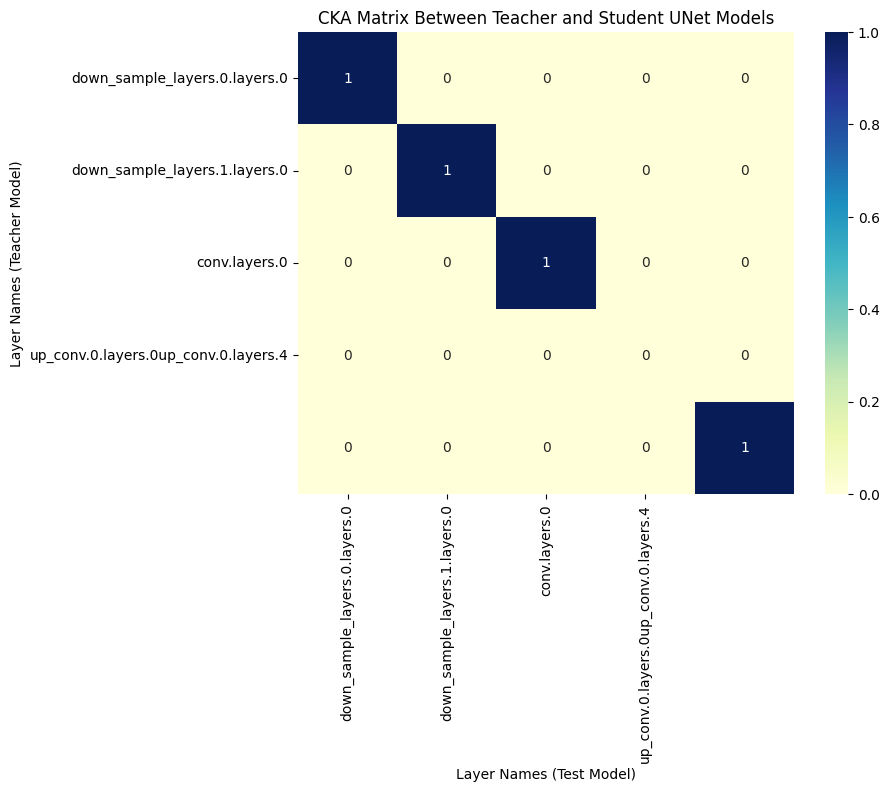

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming cka_matrix is already computed as a numpy array
# You can adjust the labels to match the layer names you are comparing

layer_names = [
    'down_sample_layers.0.layers.0',  # First downsample convolution
    #'down_sample_layers.1.layers.0',  # Second downsample convolution
    'conv.layers.0',                  # Bottleneck conv layer
    #'up_conv.0.layers.0' ,             # First upconv layer
    'up_conv.0.layers.4',  #last upconv layer
    
    
]

# Create a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(cka_matrix, annot=True, cmap="YlGnBu", xticklabels=layer_names, yticklabels=layer_names, cbar=True)

# Set title and labels
plt.title("CKA Matrix Between Teacher and Student UNet Models")
plt.xlabel("Layer Names (Test Model)")
plt.ylabel("Layer Names (Teacher Model)")

# Display the plot
plt.show()


In [43]:
cka_matrix

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.00000012, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.00000012]])

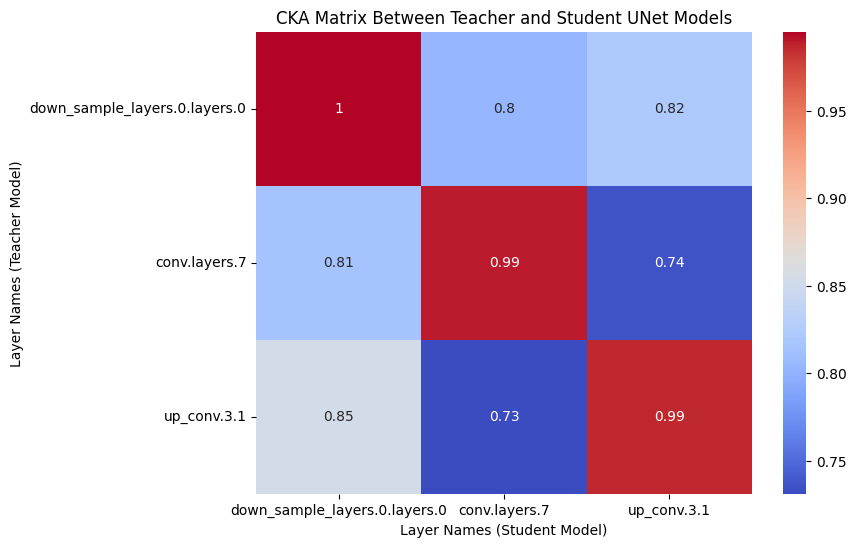

In [2]:
from torch.utils.data import DataLoader
dataset = SliceDataset(
            root="singlecoil_val",
            transform=UnetDataTransform(which_challenge="singlecoil"),
            challenge="singlecoil",
            repo_id="btoto3/fastmri-dl",
            max_len=10,
        )
dl = DataLoader(dataset, batch_size=10, shuffle=True)

# Function to extract feature maps using a hook
def extract_feature_map_new(model, layer_names, input_tensor):
    # Define a hook function to capture the feature map
    feature_map = []

    def hook_fn(module, input, output):
        feature_map.append(output)

    # Register hook
    hooks = []
    for layer_name in layer_names:
        hooks.append(dict(model.named_modules())[layer_name].register_forward_hook(hook_fn))
    
    # Forward pass
    with torch.no_grad():
        model(input_tensor)
    
    # Remove the hook
    for i in range(len(hooks)):
        hooks[i].remove()
        feature_map[i] = feature_map[i].detach()
    
    return feature_map


def compute_gram_matrix(feature_maps):
    # Compute Gram matrix: K = F^T * F (inner product of feature maps)
    return torch.matmul(feature_maps, feature_maps.T)

def center_gram_matrix(K):
    # Center the Gram matrix: subtract row and column means, and add back the mean of the matrix
    N = K.size(0)
    K_centered = K - K.mean(dim=1, keepdim=True) - K.mean(dim=0, keepdim=True) + K.mean()
    return K_centered

def compute_cka_score(feature_map_1, feature_map_2):
    # Flatten the feature maps (assuming batch dimension is 0)
    feature_map_1 = feature_map_1.view(feature_map_1.size(0), -1)
    feature_map_2 = feature_map_2.view(feature_map_2.size(0), -1)

    # Compute the Gram matrices for both feature maps
    gram_matrix_1 = compute_gram_matrix(feature_map_1)
    gram_matrix_2 = compute_gram_matrix(feature_map_2)

    # Center the Gram matrices
    gram_matrix_1 = center_gram_matrix(gram_matrix_1)
    gram_matrix_2 = center_gram_matrix(gram_matrix_2)

    # Compute the CKA score
    cka_numerator = torch.trace(torch.matmul(gram_matrix_1, gram_matrix_2))
    cka_denominator = torch.sqrt(torch.trace(torch.matmul(gram_matrix_1, gram_matrix_1)) *
                                 torch.trace(torch.matmul(gram_matrix_2, gram_matrix_2)))

    cka_score = cka_numerator / cka_denominator
    return cka_score

def compute_cka_for_two_models_batch(model_1, model_2, layer_names,  data_loader):
    # Initialize an empty list to store feature maps for each layer
    feature_maps_1 = {layer_name: [] for layer_name in layer_names}
    feature_maps_2 = {layer_name: [] for layer_name in layer_names}



    # Loop through batches and extract feature maps
    loop = 0
    for data in data_loader:
        with torch.no_grad():  # No need for gradients during CKA calculation
            # Pass the data through both models to get feature maps
            model_1(data.image.unsqueeze(1))
            model_2(data.image.unsqueeze(1))

            # Collect the feature maps for each layer
            temp_maps_1 = extract_feature_map_new(model_1, layer_names, data.image.unsqueeze(1))
            temp_maps_2 = extract_feature_map_new(model_2, layer_names, data.image.unsqueeze(1))


            for i, layer_name in enumerate(layer_names):
                if isinstance(feature_maps_1[layer_name], torch.Tensor):
                    feature_maps_1[layer_name] = torch.cat([feature_maps_1[layer_name],temp_maps_1[i]], dim=0)
                    #feature_maps_1[layer_name] = torch.cat([feature_maps_1[layer_name],extract_feature_map(model_1, layer_name, data.image.unsqueeze(1))], dim=0)
                else:   
                    feature_maps_1[layer_name] = temp_maps_1[i]
                    #feature_maps_1[layer_name].append(extract_feature_map(model_1, layer_name, data.image.unsqueeze(1)))
                if isinstance(feature_maps_2[layer_name], torch.Tensor):
                    feature_maps_2[layer_name] = torch.cat([feature_maps_2[layer_name],temp_maps_2[i]], dim=0)
                    #feature_maps_2[layer_name] = torch.cat([feature_maps_2[layer_name],extract_feature_map(model_2, layer_name, data.image.unsqueeze(1))], dim=0)
                else:
                    feature_maps_2[layer_name] = temp_maps_2[i]
                    #feature_maps_2[layer_name].append(extract_feature_map(model_2, layer_name, data.image.unsqueeze(1)))
       
        loop += 1
        if loop >= 5:
            break

    # # Convert the feature map lists to tensors
    # for layer_name in layer_names:
    #     feature_maps_1[layer_name] = torch.cat(feature_maps_1[layer_name], dim=0)
    #     feature_maps_2[layer_name] = torch.cat(feature_maps_2[layer_name], dim=0)

    # Now compute the CKA matrix across all batches for each layer
    cka_matrix = torch.zeros(len(layer_names), len(layer_names))

    for i, layer_name_1 in enumerate(layer_names):
        for j, layer_name_2 in enumerate(layer_names):
            # Compute CKA score between the feature maps of corresponding layers
            cka_matrix[i, j] = compute_cka_score(feature_maps_1[layer_name_1], feature_maps_2[layer_name_2])

    return cka_matrix
# def compute_cka_for_two_models_batch(model_1, model_2, layer_names, data_loader):
#     # Initialize empty dictionaries to store Gram matrices
#     gram_matrices_1 = {layer_name: None for layer_name in layer_names}
#     gram_matrices_2 = {layer_name: None for layer_name in layer_names}

#     # Loop through batches
#     for data in data_loader:
#         with torch.no_grad():
#             # Pass data through models
#             model_1(data.image.unsqueeze(1))
#             model_2(data.image.unsqueeze(1))

#             # Extract feature maps
#             feature_maps_1 = {layer_name: extract_feature_map(model_1, layer_name, data.image.unsqueeze(1))
#                               for layer_name in layer_names}
#             feature_maps_2 = {layer_name: extract_feature_map(model_2, layer_name, data.image.unsqueeze(1))
#                               for layer_name in layer_names}

#             # Compute/reuse Gram matrices per layer
#             for layer_name in layer_names:
#                 if gram_matrices_1[layer_name] is None:
#                     gram_matrices_1[layer_name] = center_gram_matrix(compute_gram_matrix(feature_maps_1[layer_name]))
#                 if gram_matrices_2[layer_name] is None:
#                     gram_matrices_2[layer_name] = center_gram_matrix(compute_gram_matrix(feature_maps_2[layer_name]))

#                 # Now compute CKA using pre-computed Gram matrices
#                 cka_matrix[i, j] = compute_cka_score(feature_maps_1[layer_name], feature_maps_2[layer_name])
#         break

    # Rest of the code (CKA matrix processing, visualization) remains the same

layer_names = [
    # Down-sample block
    'down_sample_layers.0.layers.0',  # First Conv in down-sample block
    #'down_sample_layers.0.layers.4',  # Last Conv in down-sample block
    
    # Bottleneck block
    #'conv.layers.0',                  # First Conv in bottleneck block
    'conv.layers.7',                  # Last Conv in bottleneck block
    
    # Up-sample block
    #'up_conv.0.layers.0',             # First Conv in up-sample block
    'up_conv.3.1',             # Last Conv in up-sample block
]

# Use the function to compute the CKA matrix for multiple batches
cka_matrix = compute_cka_for_two_models_batch(teacher_model.eval(), test_model.eval(), layer_names, dl)

import seaborn as sns
# Visualize the CKA matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cka_matrix, annot=True, cmap='coolwarm', xticklabels=layer_names, yticklabels=layer_names)
plt.title("CKA Matrix for Multiple Batches")
# Set title and labels
plt.title("CKA Matrix Between Teacher and Student UNet Models")
plt.xlabel("Layer Names (Student Model)")
plt.ylabel("Layer Names (Teacher Model)")
plt.savefig('cka-kdist3.png')
plt.show()



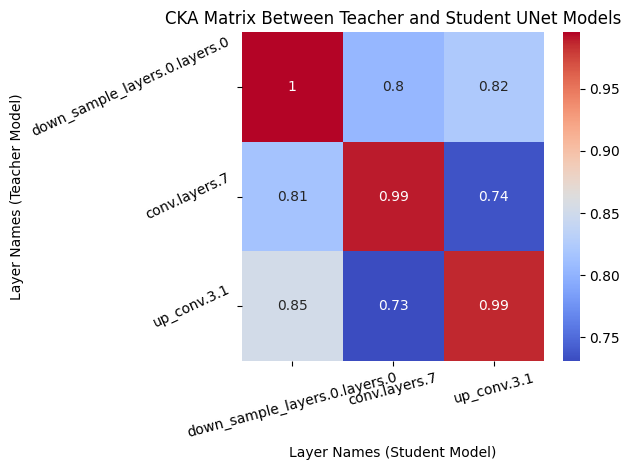

In [11]:

sns.heatmap(cka_matrix, annot=True, cmap='coolwarm', xticklabels=layer_names, yticklabels=layer_names)
plt.title("CKA Matrix for Multiple Batches")
# Set title and labels
plt.title("CKA Matrix Between Teacher and Student UNet Models")
plt.xlabel("Layer Names (Student Model)")
plt.ylabel("Layer Names (Teacher Model)")
#rotate the y labels
plt.yticks(rotation=25)
plt.xticks(rotation=15)
#make sure all labels are shown
plt.tight_layout()
plt.savefig('cka-kdist4.png')

In [6]:
cka_matrix

NameError: name 'cka_matrix' is not defined

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(cka_matrix, annot=True, cmap='coolwarm', xticklabels=layer_names, yticklabels=layer_names)
plt.title("CKA Matrix for Multiple Batches")
# Set title and labels
plt.title("CKA Matrix Between Teacher and Student UNet Models")
plt.xlabel("Layer Names (Student Model)")
plt.ylabel("Layer Names (Teacher Model)")
plt.savefig('cka-kdist.png')

NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
import seaborn as sns

# Visualize the CKA matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cka_matrix, annot=True, cmap='coolwarm', xticklabels=layer_names, yticklabels=layer_names)
plt.title("CKA Matrix for Teacher vs Student Model")
plt.show()

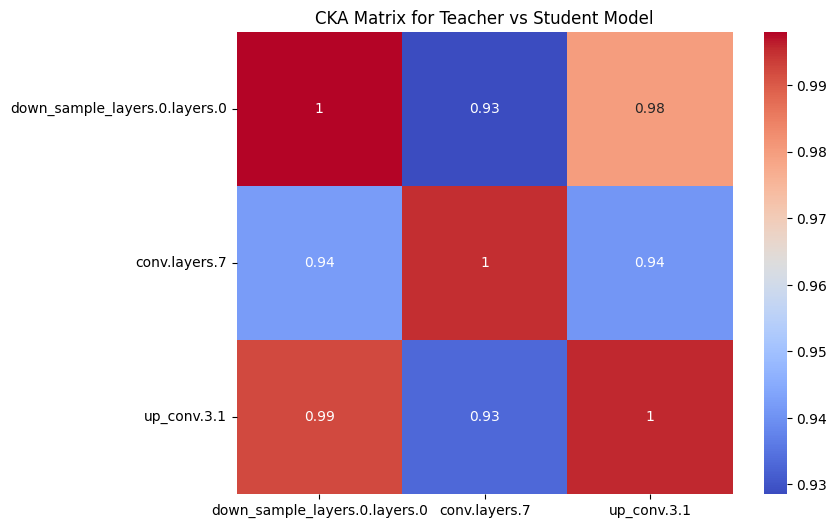

In [9]:
import seaborn as sns

# Visualize the CKA matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cka_matrix, annot=True, cmap='coolwarm', xticklabels=layer_names, yticklabels=layer_names)
plt.title("CKA Matrix for Teacher vs Student Model")
plt.show()

In [10]:
cka_matrix

tensor([[0.9980, 0.9285, 0.9799],
        [0.9420, 0.9953, 0.9409],
        [0.9922, 0.9330, 0.9957]])

In [ ]:
cka

In [ ]:
['',
 'down_sample_layers',
 'down_sample_layers.0',
 'down_sample_layers.0.layers',
 'down_sample_layers.0.layers.0',
 'down_sample_layers.0.layers.1',
 'down_sample_layers.0.layers.2',
 'down_sample_layers.0.layers.3',
 'down_sample_layers.0.layers.4',
 'down_sample_layers.0.layers.5',
 'down_sample_layers.0.layers.6',
 'down_sample_layers.0.layers.7',
 'down_sample_layers.1',
 'down_sample_layers.1.layers',
 'down_sample_layers.1.layers.0',
 'down_sample_layers.1.layers.1',
 'down_sample_layers.1.layers.2',
 'down_sample_layers.1.layers.3',
 'down_sample_layers.1.layers.4',
 'down_sample_layers.1.layers.5',
 'down_sample_layers.1.layers.6',
 'down_sample_layers.1.layers.7',
 'down_sample_layers.2',
 'down_sample_layers.2.layers',
 'down_sample_layers.2.layers.0',
 'down_sample_layers.2.layers.1',
 'down_sample_layers.2.layers.2',
 'down_sample_layers.2.layers.3',
 'down_sample_layers.2.layers.4',
 'down_sample_layers.2.layers.5',
 'down_sample_layers.2.layers.6',
 'down_sample_layers.2.layers.7',
 'do

In [49]:
for data in dl:
    print(data)

Python(82407) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(82408) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(82409) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(82410) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


UnetSample(image=tensor([[[-1.0648,  1.0035, -0.7369,  ...,  0.8181,  0.3736,  1.1296],
         [ 1.3920, -0.8057,  0.0966,  ..., -0.6944, -0.5093,  0.2294],
         [ 1.4791, -0.9501, -0.8127,  ...,  0.1046,  0.6075,  1.0058],
         ...,
         [-0.7089,  0.0791,  0.7606,  ...,  0.5090, -1.1449,  0.2754],
         [-0.5638,  0.5719, -0.5684,  ..., -1.2840, -0.2740, -0.5131],
         [ 0.0902, -0.0795, -0.6145,  ..., -0.5895, -0.5968,  1.1743]]]), target=tensor([[[-1.0648,  1.0035, -0.7369,  ...,  0.8181,  0.3736,  1.1296],
         [ 1.3920, -0.8057,  0.0966,  ..., -0.6944, -0.5093,  0.2294],
         [ 1.4791, -0.9501, -0.8127,  ...,  0.1046,  0.6075,  1.0058],
         ...,
         [-0.7089,  0.0791,  0.7606,  ...,  0.5090, -1.1449,  0.2754],
         [-0.5638,  0.5719, -0.5684,  ..., -1.2840, -0.2740, -0.5131],
         [ 0.0902, -0.0795, -0.6145,  ..., -0.5895, -0.5968,  1.1743]]]), mean=tensor([8.4932e-06]), std=tensor([5.3132e-06]), fname=('file1000000.h5',), slice_num=

KeyboardInterrupt: 